Importing Libraries

In [68]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

Loading Dataset

In [69]:
(X_train, y_train), (X_test,y_test) =datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [70]:
X_test.shape

(10000, 32, 32, 3)

In [71]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [72]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [73]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [74]:
classes[9]

'truck'

Plotting images for vizualisation

In [75]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

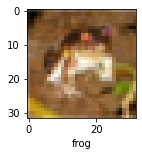

In [76]:
plot_sample(X_train, y_train, 0)

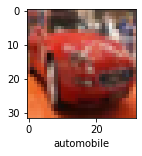

In [77]:
plot_sample(X_train, y_train, 5)

Normalizing the training dataset

In [78]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Convolutional Neural Network (CNN) to train images

In [79]:
cnn = models.Sequential([
    
    # CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [80]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4270 - accuracy: 0.4862
Epoch 2/15
1563/1563 [==============================] - 86s 55ms/step - loss: 1.0798 - accuracy: 0.6220
Epoch 3/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.9536 - accuracy: 0.6691
Epoch 4/15
1563/1563 [==============================] - 87s 56ms/step - loss: 0.8696 - accuracy: 0.6987
Epoch 5/15
1563/1563 [==============================] - 86s 55ms/step - loss: 0.8116 - accuracy: 0.7191
Epoch 6/15
1563/1563 [==============================] - 84s 53ms/step - loss: 0.7583 - accuracy: 0.7362
Epoch 7/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.7107 - accuracy: 0.7536
Epoch 8/15
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6702 - accuracy: 0.7670
Epoch 9/15
1563/1563 [==============================] - 76s 48ms/step - loss: 0.6276 - accuracy: 0.7808
Epoch 10/15
1563/1563 [==============================] - 77s 49m

In [82]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.0414 - accuracy: 0.6948


[1.0414040088653564, 0.6948000192642212]

In [83]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[7.5606181e-04, 1.6723392e-05, 2.6542265e-03, 7.5875354e-01,
        1.6873228e-05, 2.3313151e-01, 4.6184813e-03, 8.0676618e-06,
        4.0308547e-05, 4.1018293e-06],
       [8.8668162e-07, 2.3485499e-03, 8.6625061e-11, 3.1559350e-10,
        1.0562964e-12, 7.1872320e-13, 5.3861282e-10, 1.1847546e-16,
        9.9764884e-01, 1.7225809e-06],
       [3.8983978e-02, 4.5612264e-01, 3.5800671e-04, 1.0099861e-02,
        9.8453157e-02, 3.1278803e-04, 3.6687916e-04, 4.0125852e-03,
        3.5445288e-01, 3.6837041e-02],
       [9.9892312e-01, 3.9911010e-05, 4.4099630e-05, 3.1598729e-06,
        8.4234222e-07, 8.5489029e-09, 3.4396317e-07, 2.0623909e-07,
        8.5920637e-04, 1.2912868e-04],
       [2.2969791e-09, 4.8677583e-07, 2.5026491e-04, 1.9755971e-03,
        7.6268753e-03, 1.1165588e-04, 9.9002427e-01, 4.4903519e-08,
        1.0684626e-05, 2.0583433e-09]], dtype=float32)

Classification Report

In [84]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.83      0.78      0.81      1000
           2       0.61      0.58      0.60      1000
           3       0.54      0.46      0.50      1000
           4       0.60      0.67      0.63      1000
           5       0.54      0.68      0.60      1000
           6       0.77      0.72      0.74      1000
           7       0.72      0.75      0.73      1000
           8       0.81      0.80      0.81      1000
           9       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000

